# TF2 Softmax Regression

### Multinomial Classification
* 여러 클래스를 분류하는 방법
    * 이진 분류기를 여러번 쓰는 방법에 비해 행렬 연산을 하는 것이 효과적
* 이진 분류기를 여러번 쓰는 것
    * 클래스 A 모델:
    $\begin{bmatrix}x_1 & x_2 \end{bmatrix}
    \begin{bmatrix}w_{a1} \\ w_{a2}\end{bmatrix}
    = \begin{bmatrix}w_{a1}x_1 +w_{a2}x_2\end{bmatrix}$
    * 클래스 B 모델:
    $\begin{bmatrix}x_1 & x_2 \end{bmatrix}
    \begin{bmatrix}w_{b1} \\ w_{b2}\end{bmatrix}
    =\begin{bmatrix}w_{b1}x_1 +w_{b2}x_2\end{bmatrix}$
    * 클래스 C 모델:$\begin{bmatrix}x_1 & x_2 \end{bmatrix}
    \begin{bmatrix}w_{c1} \\ w_{c2}\end{bmatrix}
    =\begin{bmatrix}w_{c1}x_1 +w_{c2}x_2\end{bmatrix}$
* 하나의 행렬로 계산
    * $\begin{bmatrix}x_1 & x_2 \end{bmatrix}
    \begin{bmatrix}w_{a1}  & w_{b1} & w_{c1} \\ w_{a2} & w_{b2} &w_{c2}  \end{bmatrix}
    = \begin{bmatrix}w_{a1}x_1 +w_{a2}x_2 & w_{b1}x_1 +w_{b2}x_2 & w_{c1}x_1 +w_{c2}x_2 \end{bmatrix}$

### One-Hot Encoing
* 범주형 데이타를 숫자로 표현할 방법 필요
    * 예) {개:0, 고양이:1, 닭:2}
* 범주형 숫자 데이타를 열거형으로 표현
   * 숫자가 크기의 의미를 갖는 문제 해결
   * 문제 사례)
       * 고양이 > 개 : True
       * $닭 - 개 = 2$
* One-Hot Encoding
    * 한 요소만 1이고 나머지는 0으로 구성된 배열
    * 표현할 값에 해당하는 인덱스 요소만 1로 설정
    * `np.eye()` 함수와 Fancy Indexing으로 손쉽게 생성
        * `np.eye()`: 대각 행렬 생성
        * 예) `np.eye(3)[[0, 1, 1, 0, 2]]`


In [11]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [12]:
np.eye(3)[[0, 1, 1, 0, 2]]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

### Softmax 함수
* 다항 로지스틱 회귀
* Sigmoid 대신 Softmax 함수 사용
    * Softmax : 각 출력 값은 0~1 사이, 모든 클래스의 값의 합은 1, 확율로 사용 가능
    * sigmoid 보다 좋은 이유 : 하나의 클래스가 높은 값을 갖으면 나머지 클래스는 아주 작은 값, 배타적
* $\displaystyle \hat{P_k} = \frac{e^{z_i}}{e^{z_0} + e^{z_1} + e^{z_2}... + e^{z_k}}= \frac{e^{z_i}}{\sum_{j=0}^ke^{z_k}}$

### Softmax Prediction
* Softmax 결과에서 확률이 가장 높은 클래스 반환
* $\hat{y} = argmax(\hat{p})$
* `np.argmax(p)`
* `tf.argmax(p)`

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

logits = np.array([0.5, 0.3, 0.9])
print("logits", logits)
p = np.exp(logits) / np.sum(np.exp(logits))
print("probability:", p, "sum:", np.sum(p))
print("argmax:", np.argmax(p))

logits [0.5 0.3 0.9]
probability: [0.30206411 0.24730918 0.45062671] sum: 1.0
argmax: 2


### Cross Entropy
* 소프트 맥스의 비용함수 :
$\displaystyle J(\theta) =  -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^ky_k^{(i)}log(\hat{p_k})$
* 소프트맥스를 통과한 결과값은 어떤 특정한 클래스만 높은 값을 갖고 나머지 클래스는 아주 작은 값을 갖는다.
여기에 y는 정답 클래스인 경우만 1을 나머지는 0을 가지고 있으므로 소프트맥스를 통과한 결과와 y를 곱하는 것만으로도 정답만 값이 있고 틀린 결과는 0이다. 이 때 소프트맥스를 통과한 값을 $-log(p)$함수를 적용하면 0에 가까운 값은 매우 커지고 1에 가까운 값은 0에 가까워 진다.
따라서 $y\cdot -log(p)$는 정답과 틀리면 매우 큰 값 맞으면 0에 가까운 값이 나오므로 비용함수로 적합하다.

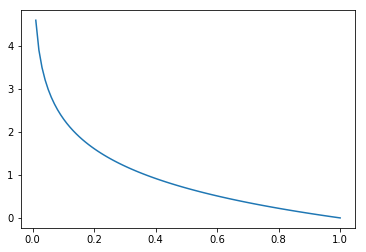

In [6]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def drawLogNegative():
    p = np.linspace(0, 1, 100)
    y = -tf.math.log(p)
    plt.plot(p, y)
drawLogNegative()

### Gradient of Cross Entropy
* $\displaystyle \nabla J(\theta) = \frac{1}{m}\sum_{i=1}^m(\hat{p}_k^{(i)} - y_k^{(i)})x^{(i)}$

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


x_data = np.array([[-0.1, 1.4],
              [-0.5, 0.2],
              [ 1.3, 0.9],
              [-0.6, 0.4],
              [-1.6, 0.2],
              [ 0.2, 0.2],
              [-0.3,-0.4],
              [ 0.7,-0.8],
              [ 1.1,-1.5],
              [-1.0, 0.9],
              [-0.5, 1.5],
              [-1.3,-0.4],
              [-1.4,-1.2],
              [-0.9,-0.7],
              [ 0.4,-1.3],
              [-0.4, 0.6],
              [ 0.3,-0.5],
              [-1.6,-0.7],
              [-0.5,-1.4],
              [-1.0,-1.4]], dtype=np.float32)
y_label = np.array([0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2])
y_data =  np.eye(3)[y_label]

colormap = np.array(['r', 'g', 'b'])
plt.scatter(x_data[:,0], x_data[:,1], s=50, c=colormap[y_label])
plt.title('Input', size=20)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np



W = tf.Variable(tf.random.normal([2, 3]))
b = tf.Variable(tf.random.normal([3]))
learing_rate = 0.05

for step in range(5001):
    with tf.GradientTape() as tape:
        hypothesis = tf.nn.softmax(tf.matmul(x_data, W) + b)
        #cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_data, logits=hypothesis))
    d_W, d_b = tape.gradient(cost, [W, b])
    W.assign_sub(learing_rate * d_W)
    b.assign_sub(learing_rate * d_b)
    if step % 200 == 0:
            print("step:{}, cost:{}".format(step, cost))

predict = tf.argmax(hypothesis, axis=1, name='predict')
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y_label),tf.float32))
print("Accuracy:{}".format(accuracy))
print(predict)

plt.title('Predict', size=20)
colormap = np.array(['r', 'g', 'b'])
plt.scatter(x_data[:,0], x_data[:,1], s=50, c=colormap[predict.numpy()])
plt.show()